# Heat map construction. Data handeling.
---
Integrated 40 years.

Charon + 4 small moons.

by cristian.giuppone@unc.edu.ar Updated: 27/10/2021

In [1]:
import pylab
from pylab import *
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import matplotlib.colors as colors


##-----------------
sty = pd.read_csv("mapt1/amps11.dat",delimiter='\s+', header=None, usecols=[1,2,16],names=['a','e','De']) 
nix = pd.read_csv("mapt2/amps11.dat",delimiter='\s+', header=None, usecols=[1,2,16],names=['a','e','De']) 
ker = pd.read_csv("mapt3/amps11.dat",delimiter='\s+', header=None, usecols=[1,2,16],names=['a','e','De']) 
hyd = pd.read_csv("mapt4/amps11.dat",delimiter='\s+', header=None, usecols=[1,2,16],names=['a','e','De']) 

c001 = pd.read_csv("elem3.dat",delimiter='\s+', header=None)
c01  = pd.read_csv("elem4.dat",delimiter='\s+', header=None)
c02  = pd.read_csv("elem5.dat",delimiter='\s+', header=None)

moons  = pd.read_csv("fort.67",delimiter='\s+', names=['m','a','e','i','M','w','N'])



# data = genfromtxt("q02/1mjupeb00/amps11.dat",usecols=(9,10,11,12, 13,14,15,16, 20,21, 32,33,34, 17)) 
# data = genfromtxt("q02/1mjupeb00/amps11.dat",usecols=(9,10,11,12, 13,14,15,16, 20,21, 32,33,34, 17)) 

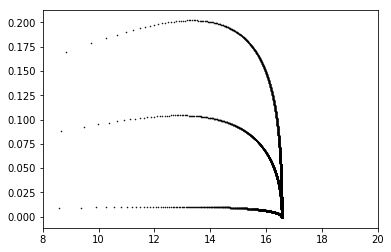

In [2]:
plt.xlim(8,20)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.savefig('evol.png')

In [3]:
# Definimos los elemenos de la grilla a plotear
a_grid    = np.sort(sty.a.unique())
e_grid    = np.sort(sty.e.unique())
data_gridsty = sty.set_index(['a','e']).unstack(level=0).values
data_gridnix = nix.set_index(['a','e']).unstack(level=0).values
data_gridker = ker.set_index(['a','e']).unstack(level=0).values
data_gridhyd = hyd.set_index(['a','e']).unstack(level=0).values

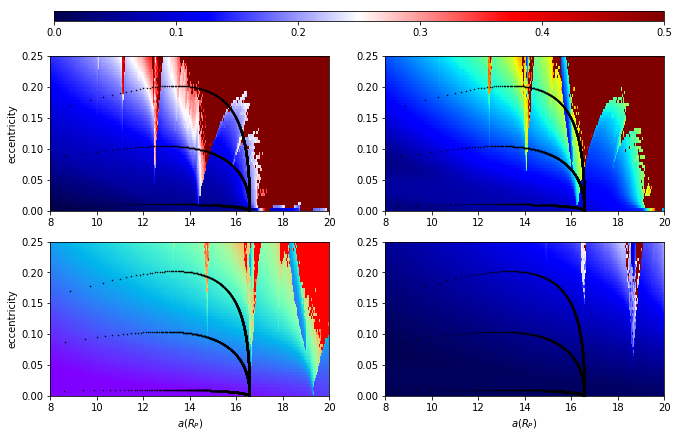

In [4]:
fig=plt.figure(figsize=(11,7))

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridsty * 2, vmin=0.01, vmax=0.3, shading='auto', cmap=plt.get_cmap('seismic') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.ylabel(r'eccentricity')

ax1=plt.subplot(2,2,2)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridnix * 2, vmin=0.01, vmax=0.3, shading='auto', cmap=plt.get_cmap('jet') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)

ax1=plt.subplot(2,2,3)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridker * 2, vmin=0.01, vmax=0.3, shading='auto', cmap=plt.get_cmap('rainbow') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.ylabel(r'eccentricity')
plt.xlabel(r'$a (R_P)$')

ax1=plt.subplot(2,2,4)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridhyd * 2, vmin=0, vmax=0.5, shading='auto', cmap=plt.get_cmap('seismic') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.xlabel(r'$a (R_P)$')

#plt.colorbar(label=r'$\Delta e$')
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.13, 0.87, 0.77, 0.02])
fig.colorbar(pcm, cax=cbar_ax,orientation='horizontal')

# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right',size='5%', pad=0.3)
# fig.colorbar(ax1,cax=cax,orientation='horizontal')
# cax.set_title(r'$\log(\Delta e)$')
# cax.tick_params(labelsize=13)
plt.savefig('de.png')


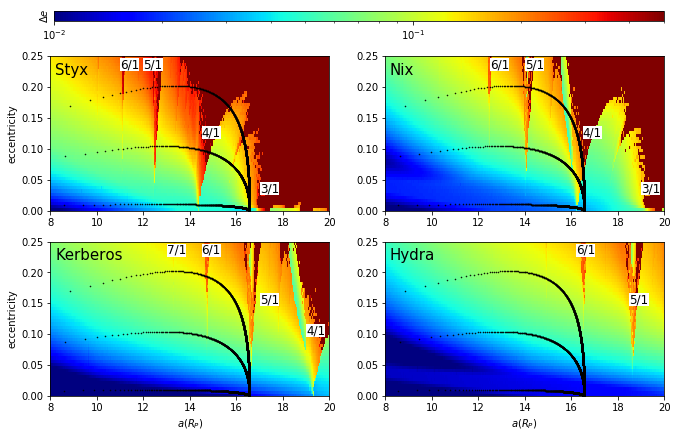

In [5]:
fig=plt.figure(figsize=(11,7))

ax1=plt.subplot(2,2,1)
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridsty * 2, vmin=0.01, vmax=0.3, shading='auto', cmap=plt.get_cmap('jet') )
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridsty * 2, norm=colors.LogNorm(0.01,0.3) , shading='auto', cmap=plt.get_cmap('jet') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.ylabel(r'eccentricity')
plt.text(8.2,0.22, 'Styx', fontsize=15, color='black')
plt.text(11,0.23, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(12,0.23, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(14.5,0.12, '4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(17.,0.03, '3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))


ax1=plt.subplot(2,2,2)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridnix * 2, norm=colors.LogNorm(0.01,0.5), shading='auto', cmap=plt.get_cmap('jet') )
plt.text(8.2,0.22, 'Nix', fontsize=15, color='black')
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.text(12.5,0.23, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(14,0.23, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(16.5,0.12, '4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(19.,0.03, '3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))

ax1=plt.subplot(2,2,3)
plt.text(8.2,0.22, 'Kerberos', fontsize=15, color='black')
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridker * 2, norm=colors.LogNorm(0.01,0.5), shading='auto', cmap=plt.get_cmap('jet') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.text(13,0.23, '7/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(14.5,0.23, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(17,0.15, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(19,0.1, '4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))

plt.ylabel(r'eccentricity')
plt.xlabel(r'$a (R_P)$')

ax1=plt.subplot(2,2,4)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_gridhyd * 2, norm=colors.LogNorm(0.01,0.5), shading='auto', cmap=plt.get_cmap('jet') )
plt.xlim(8,20)
plt.ylim(0,0.25)
plt.text(8.2,0.22, 'Hydra', fontsize=15, color='black')
plt.scatter(c001[1],c001[3],c='k',s=0.3)
plt.scatter(c01[1],c01[3],c='k',s =0.3)
plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.text(16.2,0.23, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(18.5,0.15, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.xlabel(r'$a (R_P)$')

#plt.colorbar(label=r'$\Delta e$')
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.13, 0.87, 0.77, 0.02])
fig.colorbar(pcm, cax=cbar_ax,orientation='horizontal')
plt.ylabel(r'$\Delta e$')

# divider = make_axes_locatable(ax1)
# cax = divider.append_axes('right',size='5%', pad=0.3)
# fig.colorbar(ax1,cax=cax,orientation='horizontal')
# cax.set_title(r'$\log(\Delta e)$')
# cax.tick_params(labelsize=13)
plt.savefig('Fig2-evol.png', dpi=200, bbox_inches='tight')


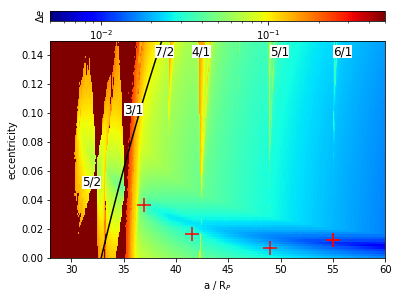

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data   = pd.read_csv("mapae004m1new/amps11.dat",delimiter='\s+', header=None, usecols=[1,2,16],names=['a','e','De']) 
# plt.scatter(data.a,data.e)
# Definimos los elemenos de la grilla a plotear
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,1,1)
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, vmin=-0.02, vmax=0.4, shading='flat', cmap=plt.get_cmap('jet') )
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, norm=colors.LogNorm(0.005,0.5), cmap=plt.get_cmap('jet') )
plt.text(55,0.14, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(49,0.14, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(38,0.14, '7/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(41.5,0.14,'4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(35.,0.1, '3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(31.,0.05, '5/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))

plt.scatter(moons.a[1:]/1188,moons.e[1:], c='r', marker='+', s=200)

ec=0.00058
ap = 19611./1188.
mp = 1.30336E+22
mc = 1.58693E+21

mu = mc/(mc+mp)
x=np.arange(30,60,30./100.)
apo  = (1.6+5.1*ec-2.22*ec**2+4.12*mu-4.27*mu*ec-5.09*mu**2+4.61*ec**2*mu**2)*ap
elim = 1- apo/x
plt.plot(x,elim, c='k')
plt.ylim(0,0.15)
# plt.xlim(8,20)
# plt.ylim(0,0.25)
# plt.scatter(c001[1],c001[3],c='k',s=0.3)
# plt.scatter(c01[1],c01[3],c='k',s =0.3)
# plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.ylabel(r'eccentricity')
plt.xlabel(r'a / R$_P$')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-3
                   )
fig.colorbar(pcm, cax=axins, orientation="horizontal")
plt.ylabel(r'$\Delta e$')
# x

# # plt.colorbar('top', orientation='horizontal')
plt.savefig('Fig1-1-planeae.png', dpi=200, bbox_inches='tight')


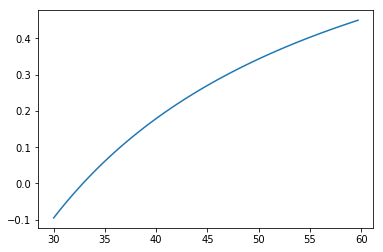

In [7]:
ec=0.00058
ap = 19611./1188.
mp = 1.30336E+22
mc = 1.58693E+21

mu = mc/(mc+mp)
x=np.arange(30,60,30./100.)
apo  = (1.6+5.1*ec-2.22*ec**2+4.12*mu-4.27*mu*ec-5.09*mu**2+4.61*ec**2*mu**2)*ap
elim = 1- apo/x
plt.plot(x,elim)

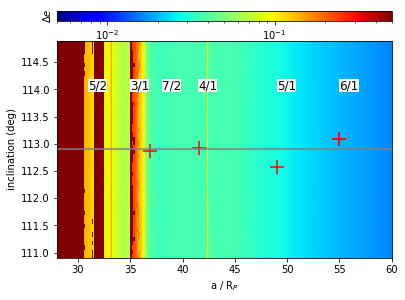

In [8]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
data   = pd.read_csv("mapai126m1new/amps11.dat",delimiter='\s+', header=None, usecols=[1,3,16],names=['a','e','De']) 
#data   = pd.read_csv("mapai126m1new/amps11.dat",delimiter='\s+', header=None, usecols=[1,2,16],names=['a','e','De']) 
# Definimos los elemenos de la grilla a plotear
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,1,1)
plt.scatter(moons.a[1:]/1188,moons.i[1:], c='r', marker='+', s=200)
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, norm=colors.LogNorm(0.01,0.2), shading='auto', cmap=plt.get_cmap('jet') )
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, norm=colors.LogNorm(0.01,0.2), shading='auto', cmap=plt.get_cmap('jet') )
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, norm=colors.LogNorm(0.005,0.5), cmap=plt.get_cmap('jet') )
plt.scatter(moons.a[1:]/1188,moons.i[1:], c='r', marker='+', s=200)

plt.text(55,114, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(49,114, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(38,114, '7/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(41.5,114,'4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(35.,114 ,'3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(31.,114, '5/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
# plt.xlim(8,20)
# plt.ylim(0,0.25)
# plt.scatter(c001[1],c001[3],c='k',s=0.3)
# plt.scatter(c01[1],c01[3],c='k',s =0.3)
# plt.scatter(c02[1],c02[3],c='k', s=0.3)
plt.ylabel(r'inclination (deg)')
plt.xlabel(r'a / R$_P$')
plt.axhline(y=112.8979525822, c='gray')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-3
                   )
fig.colorbar(pcm, cax=axins, orientation="horizontal")
plt.ylabel(r'$\Delta e$')

# plt.show()
plt.savefig('Fig1-1-planeai.png', dpi=200, bbox_inches='tight')

# plt.colorbar('top', orientation='horizontal')


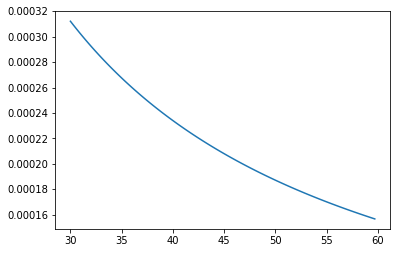

In [9]:
ef=0.01
ap = 19596.
ep = 0.00058
mp = 1.30336E+22
mc = 1.58693E+21
ap = 19596./1188.
x=np.arange(30,60,30./100.)

plt.plot(x,5./4.*ep*(mp-mc)/(mp+mc)*ap/x)

In [10]:
# tmax = 500  #resto 1 año por si hubo algún tema con el tiempo final de la integración
# print (tmax) #fifarse q cuando imprimo tmax no es 500, sino q puede sobrar un remanente del delta_t
# data_gridn = data_grid
# delta_gridn[time < tmax]= 1.

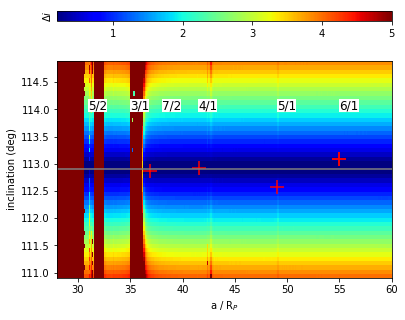

In [23]:
data   = pd.read_csv("mapai126m1new/amps11.dat",delimiter='\s+', header=None, usecols=[1,3,29],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,1,1)
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, norm=colors.LogNorm(0.001,1) , shading='auto', cmap=plt.get_cmap('jet') )
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid , norm=colors.LogNorm(0.05,10) , shading='auto', cmap=plt.get_cmap('jet') )
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid , vmin=0.2, vmax=5 , shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:]/1188,moons.i[1:], c='r', marker='+', s=200)
plt.text(55,114, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(49,114, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(38,114, '7/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(41.5,114,'4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(35.,114 ,'3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(31.,114, '5/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))

plt.axhline(y=112.8979525822, c='gray')

plt.ylabel(r'inclination (deg)')
plt.xlabel(r'a / R$_P$')

axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-5
                   )
fig.colorbar(pcm, cax=axins, orientation="horizontal")

plt.ylabel(r'$\Delta i$')


plt.savefig('Fig1-1-planeaiDi.png', dpi=200, bbox_inches='tight')



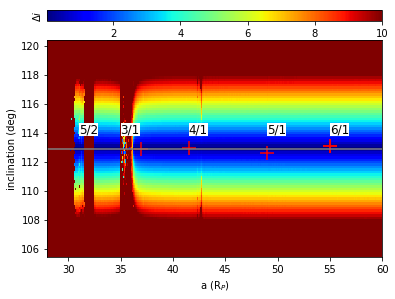

In [12]:
data   = pd.read_csv("mapai126m1newinc/amps11.dat",delimiter='\s+', header=None, usecols=[1,3,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,1,1)
# pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid , norm=colors.LogNorm(0.05,1), shading='auto', cmap=plt.get_cmap('jet') )
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid , vmin=0.05, vmax=10, shading='auto', cmap=plt.get_cmap('jet') )
plt.scatter(moons.a[1:]/1188,moons.i[1:], c='r', marker='+', s=200)

plt.axhline(y=112.8979525822, c='gray')
plt.text(55,114, '6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(49,114, '5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
# plt.text(38,114, '7/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(41.5,114,'4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(35.,114 ,'3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(31.,114, '5/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))


plt.ylabel(r'inclination (deg)')
plt.xlabel(r'a (R$_P$)')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-3
                   )
fig.colorbar(pcm, cax=axins, orientation="horizontal")
plt.ylabel(r'$\Delta i$')

plt.savefig('Fig1-1-planeai.png', dpi=200, bbox_inches='tight')


In [13]:
!

/usr/local/lib/python3.5/dist-packages/matplotlib/colors.py:1028: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


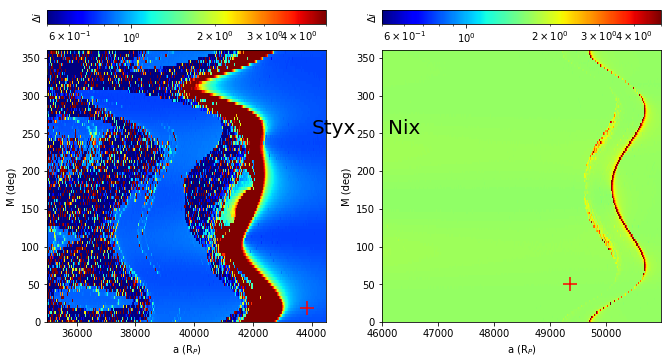

In [14]:
fig=plt.figure(figsize=(11,5))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , norm=colors.LogNorm(0.5,5), shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(44000,250, 'Styx', fontsize=20, color='black')

plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-4
                   )
fig.colorbar(pcm, cax=axins, orientation="horizontal")
plt.ylabel(r'$\Delta i$')

data   = pd.read_csv("map0Nixnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,2,2)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, norm=colors.LogNorm(0.5,5), shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))

plt.scatter(moons.a[2:3],moons.M[2:3], c='r', marker='+', s=200)
plt.text(46100,250, 'Nix', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-4
                   )
fig.colorbar(pcm, cax=axins, orientation="horizontal")
plt.ylabel(r'$\Delta i$')


plt.savefig('styxnix-aM.png', dpi=300)


1    43856.691622
Name: a, dtype: float64 1    18.78891
Name: M, dtype: float64


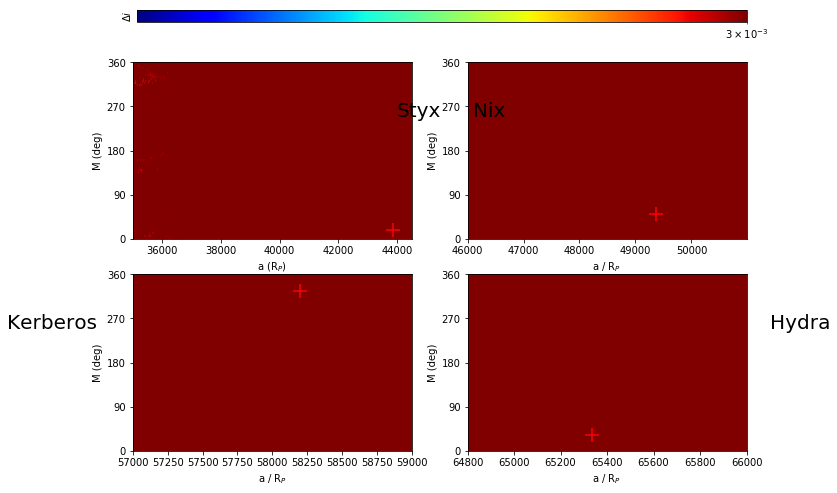

In [15]:
fig=plt.figure(figsize=(11,8))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, norm=colors.LogNorm(0.005,0.5), shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(44000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
# axins = inset_axes(ax1,
#                     width="100%",  
#                     height="5%",
#                     loc='upper center',
#                     borderpad=-4
#                    )
# fig.colorbar(pcm, cax=axins, orientation="horizontal")
# plt.ylabel(r'$\Delta i$')

data   = pd.read_csv("map0Nixnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,2)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, norm=colors.LogNorm(0.005,0.2), shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))

plt.scatter(moons.a[2:3],moons.M[2:3], c='r', marker='+', s=200)
plt.text(46100,250, 'Nix', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
plt.yticks(np.arange(0, 361, step=90))
# fig.colorbar(pcm, cax=axins, orientation="horizontal")
# plt.ylabel(r'$\Delta i$')
data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
plt.yticks(np.arange(0, 361, step=90))
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
ax1=plt.subplot(2,2,3)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, norm=colors.LogNorm(0.005,0.007), shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))

plt.scatter(moons.a[3:4],moons.M[3:4], c='r', marker='+', s=200)
plt.text(56100,250, 'Kerberos', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
plt.yticks(np.arange(0, 361, step=90))

data   = pd.read_csv("map0Hydnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,4)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, norm=colors.LogNorm(0.0024,0.003), shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))
plt.yticks(np.arange(0, 361, step=90))
plt.scatter(moons.a[4:5],moons.M[4:5], c='r', marker='+', s=200)
plt.text(66100,250, 'Hydra', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')


#plt.colorbar(label=r'$\Delta e$')
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.13, 0.87, 0.77, 0.02])
fig.colorbar(pcm, cax=cbar_ax,orientation='horizontal')
plt.ylabel(r'$\Delta i$')

plt.savefig('moons-aMdi.png', dpi=250)

print(moons.a[1:2],moons.M[1:2])

1    43856.691622
Name: a, dtype: float64 1    18.78891
Name: M, dtype: float64


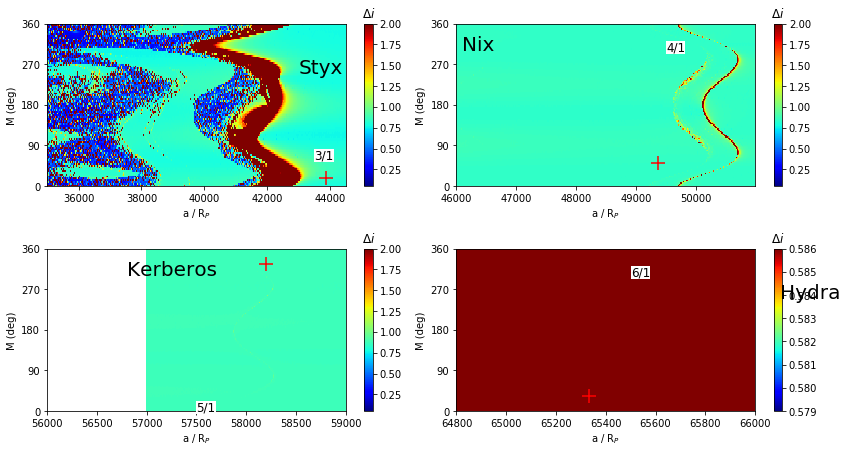

In [16]:
fig=plt.figure(figsize=(15*.8,8*.8))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=0.05,vmax=2, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(43000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
plt.text(43500,60,'3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta i$')

data   = pd.read_csv("map0Nixnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,2)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid, vmin=0.05,vmax=2, shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))

plt.scatter(moons.a[2:3],moons.M[2:3], c='r', marker='+', s=200)
plt.text(49500,300,'4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(46100,300, 'Nix', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
plt.yticks(np.arange(0, 361, step=90))


cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta i$')

data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
plt.yticks(np.arange(0, 361, step=90))
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
ax1=plt.subplot(2,2,3)
# pcm=plt.pcolormesh(a_grid, e_grid, data_grid, norm=colors.LogNorm(0.01,3), shading='auto', cmap=plt.get_cmap('jet') )
pcm=plt.pcolormesh(a_grid, e_grid, data_grid, vmin=0.05,vmax=2, shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))

plt.scatter(moons.a[3:4],moons.M[3:4], c='r', marker='+', s=200)
plt.xlim(56000,59000)
plt.text(56800,300, 'Kerberos', fontsize=20, color='black')
plt.text(57500,0,'5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
plt.yticks(np.arange(0, 361, step=90))
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta i$')

data   = pd.read_csv("map0Hydnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,4)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=0.579,vmax=0.586, shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))
plt.yticks(np.arange(0, 361, step=90))
plt.scatter(moons.a[4:5],moons.M[4:5], c='r', marker='+', s=200)
plt.text(66100,250, 'Hydra', fontsize=20, color='black')
plt.text(65500,300,'6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta i$')
plt.tight_layout()


# #plt.colorbar(label=r'$\Delta e$')
# fig.subplots_adjust(top=0.8)
# cbar_ax = fig.add_axes([0.13, 0.87, 0.77, 0.02])
# fig.colorbar(pcm, cax=cbar_ax,orientation='horizontal')
# plt.ylabel(r'$\Delta i$')

plt.savefig('moons-aMdi.png', dpi=250, bbox_inches='tight')

print(moons.a[1:2],moons.M[1:2])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


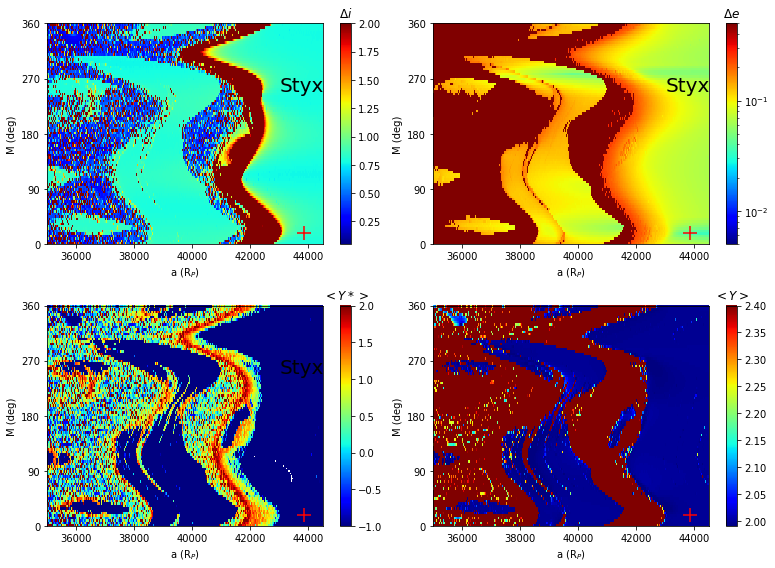

In [17]:
fig=plt.figure(figsize=(11,8))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=0.05,vmax=2, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(43000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta i$')

ax1=plt.subplot(2,2,2)
data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, norm=colors.LogNorm(0.005,0.5), shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(43000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta e$')
plt.tight_layout()


ax1=plt.subplot(2,2,3)
data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
pcm=plt.pcolormesh(a_grid, e_grid, np.log10(np.abs(data_grid-2)) , vmin=-1, vmax=2, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(43000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$<Y*>$')
plt.tight_layout()


ax1=plt.subplot(2,2,4)
data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=1.99, vmax=2.4, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
# plt.text(44000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$<Y>$')
plt.tight_layout()

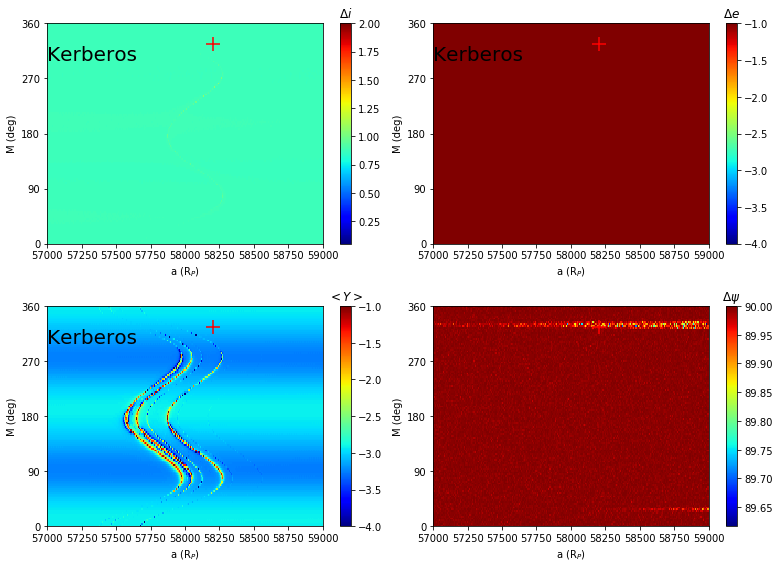

In [18]:
fig=plt.figure(figsize=(11,8))

data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,39],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=0.05,vmax=2, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[3:4],moons.M[3:4], c='red', marker='+', s=200, zorder=3)
plt.text(57000,300, 'Kerberos', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta i$')

ax1=plt.subplot(2,2,2)
data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, vmin=-4, vmax=-1, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[3:4],moons.M[3:4], c='red', marker='+', s=200, zorder=3)
plt.text(57000,300, 'Kerberos', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta e$')
plt.tight_layout()


ax1=plt.subplot(2,2,3)
data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
pcm=plt.pcolormesh(a_grid, e_grid, (data_grid) , vmin=-4, vmax=-1, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[3:4],moons.M[3:4], c='red', marker='+', s=200, zorder=3)
plt.text(57000,300, 'Kerberos', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$<Y>$')
plt.tight_layout()


ax1=plt.subplot(2,2,4)
data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,40],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[3:4],moons.M[3:4], c='red', marker='+', s=200, zorder=3)
# plt.text(44000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta \psi$')
plt.tight_layout()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log10


1    43856.691622
Name: a, dtype: float64 1    18.78891
Name: M, dtype: float64


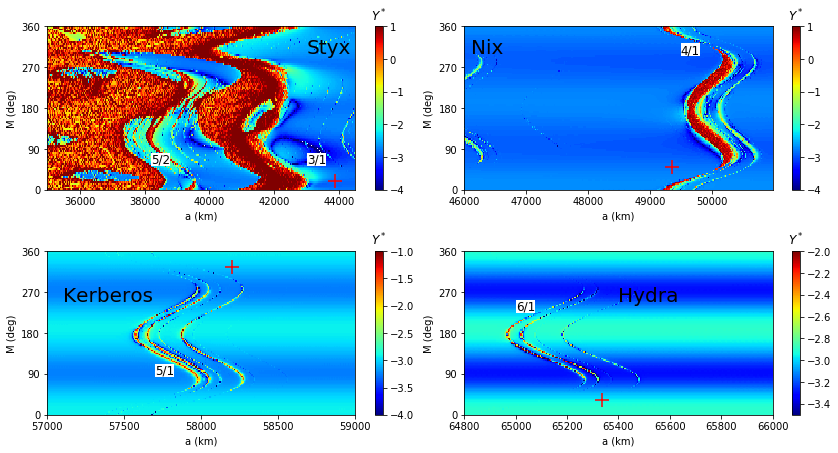

In [20]:
# fig=plt.figure(figsize=(11,8))
fig=plt.figure(figsize=(15*.8,8*.8))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, np.log10(np.abs(data_grid-2.0)) , vmin=-4, vmax=1, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(43000,300, 'Styx', fontsize=20, color='black')
plt.text(43000,60,'3/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.text(38200,60,'5/2', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (km)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$Y^*$')
plt.tight_layout()
# fig.colorbar(pcm, cax=axins, orientation="horizontal")
# plt.ylabel(r'$\Delta i$')

data   = pd.read_csv("map0Nixnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,2)
pcm=plt.pcolormesh(a_grid, e_grid, np.log10(np.abs(data_grid-2.0)) , vmin=-4, vmax=1, shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$Y^*$')
plt.tight_layout()
plt.scatter(moons.a[2:3],moons.M[2:3], c='r', marker='+', s=200)
plt.text(46100,300, 'Nix', fontsize=20, color='black')
plt.text(49500,300,'4/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (km)')
plt.yticks(np.arange(0, 361, step=90))
# fig.colorbar(pcm, cax=axins, orientation="horizontal")
# plt.ylabel(r'$\Delta i$')
data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
plt.yticks(np.arange(0, 361, step=90))
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
ax1=plt.subplot(2,2,3)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=-4, vmax=-1,  shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))


plt.scatter(moons.a[3:4],moons.M[3:4], c='r', marker='+', s=200)
plt.text(57100,250, 'Kerberos', fontsize=20, color='black')
plt.text(57700,90,'5/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.yticks(np.arange(0, 361, step=90))
plt.xticks(np.arange(57000,59500, step=500))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (km)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$Y^*$')
plt.tight_layout()

data   = pd.read_csv("map0Hydnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,8],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,4)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid , vmin=-3.5, vmax=-2,shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))
plt.yticks(np.arange(0, 361, step=90))
plt.scatter(moons.a[4:5],moons.M[4:5], c='r', marker='+', s=200)
plt.text(65400,250, 'Hydra', fontsize=20, color='black')
plt.text(65000,230,'6/1', fontsize=12, color='black',bbox=dict(facecolor='white', edgecolor='none',boxstyle='square,pad=0'))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (km)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$Y^*$')
plt.tight_layout()

#plt.colorbar(label=r'$\Delta e$')
# fig.subplots_adjust(top=0.8)
# cbar_ax = fig.add_axes([0.13, 0.87, 0.77, 0.02])
# fig.colorbar(pcm, cax=cbar_ax,orientation='horizontal')
# plt.ylabel(r'$\Delta e$')

plt.savefig('moons-aMMe.png', dpi=300,bbox_inches='tight')

print(moons.a[1:2],moons.M[1:2])

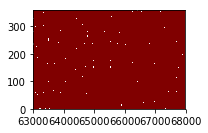

1    43856.691622
Name: a, dtype: float64 1    18.78891
Name: M, dtype: float64


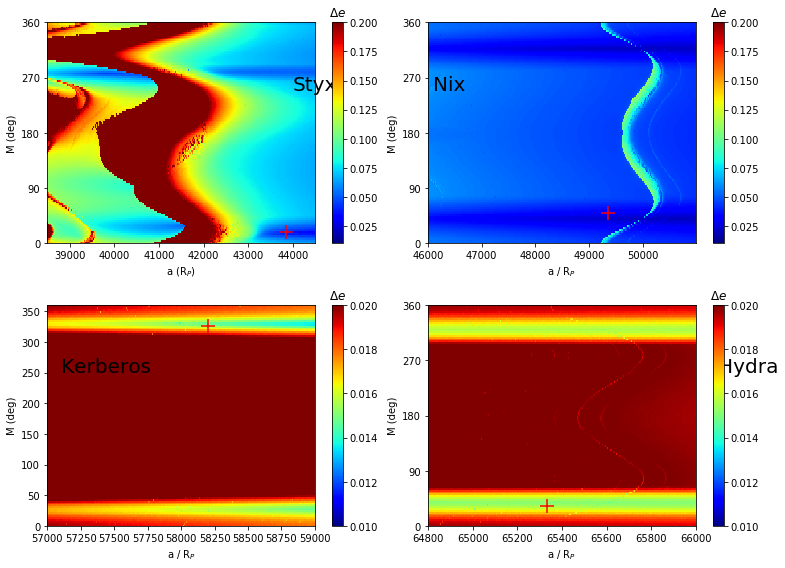

In [72]:
fig=plt.figure(figsize=(11,8))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,1)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, vmin=0.01, vmax=0.2, shading='auto', cmap=plt.get_cmap('jet') )

plt.scatter(moons.a[1:2],moons.M[1:2], c='red', marker='+', s=200, zorder=3)
plt.text(44000,250, 'Styx', fontsize=20, color='black')
plt.yticks(np.arange(0, 361, step=90))
plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta e$')
plt.tight_layout()
# fig.colorbar(pcm, cax=axins, orientation="horizontal")
# plt.ylabel(r'$\Delta i$')

data   = pd.read_csv("map0Nixnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,2)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, vmin=0.01, vmax=0.2, shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta e$')
plt.tight_layout()
plt.scatter(moons.a[2:3],moons.M[2:3], c='r', marker='+', s=200)
plt.text(46100,250, 'Nix', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
plt.yticks(np.arange(0, 361, step=90))
# fig.colorbar(pcm, cax=axins, orientation="horizontal")
# plt.ylabel(r'$\Delta i$')
data   = pd.read_csv("map0Kernew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
plt.yticks(np.arange(0, 361, step=90))
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values
ax1=plt.subplot(2,2,3)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, vmin=0.01, vmax=0.02,  shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))

plt.scatter(moons.a[3:4],moons.M[3:4], c='r', marker='+', s=200)
plt.text(57100,250, 'Kerberos', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta e$')
plt.tight_layout()

data   = pd.read_csv("map0Hydnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(2,2,4)
pcm=plt.pcolormesh(a_grid, e_grid, data_grid * 2, vmin=0.01, vmax=0.02, shading='auto', cmap=plt.get_cmap('jet') )
# plt.xticks(np.arange(0, 361, step=90.))
plt.yticks(np.arange(0, 361, step=90))
plt.scatter(moons.a[4:5],moons.M[4:5], c='r', marker='+', s=200)
plt.text(66100,250, 'Hydra', fontsize=20, color='black')
plt.ylabel(r'M (deg)')
plt.xlabel(r'a / R$_P$')
cbar = plt.colorbar(pcm)
cbar.ax.set_title(r'$\Delta e$')
plt.tight_layout()

#plt.colorbar(label=r'$\Delta e$')
# fig.subplots_adjust(top=0.8)
# cbar_ax = fig.add_axes([0.13, 0.87, 0.77, 0.02])
# fig.colorbar(pcm, cax=cbar_ax,orientation='horizontal')
# plt.ylabel(r'$\Delta e$')

plt.savefig('moons-aMde.png', dpi=300)

print(moons.a[1:2],moons.M[1:2])

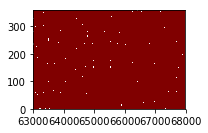

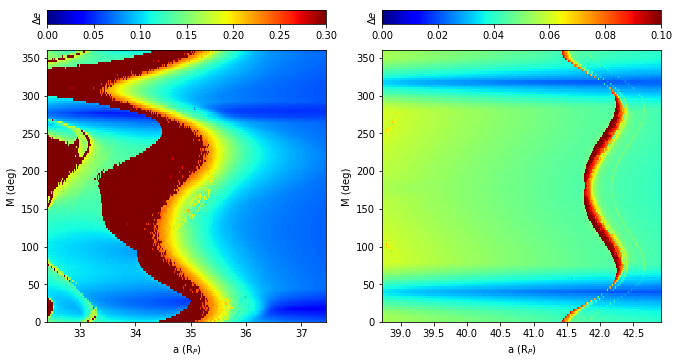

In [69]:
fig=plt.figure(figsize=(11,5))

data   = pd.read_csv("map0new/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,2,1)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, vmin=-0.0, vmax=0.3, shading='auto', cmap=plt.get_cmap('jet') )

plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-4
                   )
plt.ylabel(r'$\Delta e$')

fig.colorbar(pcm, cax=axins, orientation="horizontal")

data   = pd.read_csv("map0Nixnew/amps11.dat",delimiter='\s+', header=None, usecols=[1,4,16],names=['a','e','Di']) 
a_grid    = np.sort(data.a.unique())
e_grid    = np.sort(data.e.unique())
data_grid = data.set_index(['a','e']).unstack(level=0).values

ax1=plt.subplot(1,2,2)
pcm=plt.pcolormesh(a_grid/1188., e_grid, data_grid * 2, vmin=-0.0, vmax=0.1, shading='auto', cmap=plt.get_cmap('jet') )

plt.ylabel(r'M (deg)')
plt.xlabel(r'a (R$_P$)')
axins = inset_axes(ax1,
                    width="100%",  
                    height="5%",
                    loc='upper center',
                    borderpad=-4
                   )
plt.ylabel(r'$\Delta e$')

fig.colorbar(pcm, cax=axins, orientation="horizontal")